# Clasificación con Red Neuronal Convolucional

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Importar Dataset

In [2]:
# Importar dataset y dividirlo
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Mostrar algunos datos

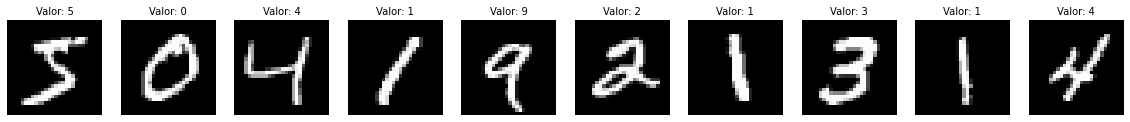

In [3]:
plt.figure(figsize=(20,4))

for index, (imagen, etiqueta) in enumerate(zip(x_train[0:10], y_train[0:10])):
  plt.subplot(1, 10, index+1)
  plt.imshow(imagen, cmap=plt.cm.gray)
  plt.title('Valor: %i' % etiqueta, fontsize=10)
  plt.axis('off')

In [4]:
# Agregar una columna de 1's para indicar a la red que cada
# imagen sólo tiene 1 canal
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Agregar cuatro píxeles más a cada imagen para que sean de 32x32
# como en el artículo
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

Normalizar Datos

In [5]:
# Para normalizar debe conocerse el valor máximo
print(x_train.max(), x_train.min())

255 0


In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.max(), x_train.min())

1.0 0.0


Crear conjunto de validación

In [7]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento para tener uno de validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.83)

In [8]:
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)

(49800, 32, 32, 1) (10200, 32, 32, 1) (10000, 32, 32, 1)
(49800,) (10200,) (10000,)


Cambiar etiquetas a codificación 'One Hot'

In [9]:
from tensorflow.keras.utils import to_categorical

print(y_train[1])
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)
print(y_train[1])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


### Creación de la Red Convolucional

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(6,(5,5), strides=1, activation='relu', input_shape=(32,32,1), padding='valid')) #C1
model.add(AveragePooling2D(pool_size=(2,2))) #S2
model.add(Conv2D(16,(5,5), strides=1, activation='sigmoid', padding='valid')) #C3
model.add(AveragePooling2D(pool_size=(2,2))) #S4
model.add(Conv2D(120,(5,5), strides=1, activation='sigmoid', padding='valid')) #C5
model.add(tf.keras.layers.Flatten())
model.add(Dense(units = 84, activation = 'relu')) #F6
model.add(Dense(units = 10, activation = 'softmax')) #OUTPUT

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

### Entrenar Modelo

In [12]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 25 , batch_size = 32, verbose = 1)

Epoch 1/25
1557/1557 [==============================] - 43s 27ms/step - loss: 0.4448 - accuracy: 0.8594 - val_loss: 0.1380 - val_accuracy: 0.9584
Epoch 2/25
1557/1557 [==============================] - 36s 23ms/step - loss: 0.1167 - accuracy: 0.9631 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 3/25
1557/1557 [==============================] - 39s 25ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 4/25
1557/1557 [==============================] - 36s 23ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.0626 - val_accuracy: 0.9805
Epoch 5/25
1557/1557 [==============================] - 37s 24ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0553 - val_accuracy: 0.9829
Epoch 6/25
1557/1557 [==============================] - 38s 25ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.0614 - val_accuracy: 0.9812
Epoch 7/25
1557/1557 [==============================] - 38s 24ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0540 -

### Predicciones

In [13]:
# Predecir con el modelo
pred = model.predict(x_test)
# Devolver la posición del valor más alto de cada predicción (ya que está en One Hot)
pred = np.argmax(pred, axis = 1) 
print(pred)
print(pred.shape)

[7 2 1 ... 4 5 6]
(10000,)


In [14]:
# Comparar y_test con las predicciones
score = model.evaluate(x_test, y_test)
print('Loss:', score[0]) 
print('Accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0594 - accuracy: 0.9862
Loss: 0.05940869078040123
Accuracy: 0.9861999750137329
